In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading the train and test files
train = pd.read_csv('Sberbank/train.csv')
test = pd.read_csv('Sberbank/test.csv')
train.drop(['id'], axis=1)
test.drop(['id'], axis=1)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,12/9/2013,50,34.0,4.0,9.0,1.0,1978.0,3.0,6.0,3.0,...,9,0,0,5,27,0,1,42,9,8000000
1,1/13/2012,38,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,27,7,0,15,33,1,12,66,14,5640000
2,4/2/2015,38,19.0,12.0,16.0,5.0,1984.0,1.0,9.0,1.0,...,7,2,0,6,11,0,2,42,10,6800000
3,3/26/2014,65,65.0,1.0,16.0,1.0,1980.0,3.0,8.0,2.0,...,18,7,0,18,32,1,3,78,11,9400000
4,5/6/2014,37,NaN,10.0,17.0,1.0,NaN,1.0,1.0,NaN,...,7,2,0,5,14,0,3,17,2,3860454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,8/28/2013,61,NaN,4.0,17.0,1.0,NaN,2.0,1.0,1.0,...,1,0,0,2,3,0,0,6,1,5764128
6091,4/16/2015,52,30.0,3.0,10.0,1.0,1994.0,2.0,8.0,3.0,...,3,1,0,6,12,0,4,28,5,9250000
6092,7/22/2014,104,60.0,9.0,20.0,4.0,2011.0,3.0,11.0,1.0,...,54,13,1,29,47,1,16,91,14,15443416
6093,4/15/2014,38,NaN,11.0,17.0,1.0,NaN,1.0,1.0,NaN,...,7,2,0,5,14,0,3,17,2,3904444


In [3]:
train.shape,test.shape

((24376, 292), (6095, 292))

In [4]:
train = train[0:6000]
test = test[0:6000]

In [5]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,6638,3/20/2013,51,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,1,0,0,4,6,0,0,4,1,5014900
1,26338,12/12/2014,45,27.0,1.0,12.0,1.0,1973.0,2.0,6.0,...,46,6,2,23,50,0,11,110,6,8150000
2,18447,5/15/2014,45,17.0,10.0,17.0,1.0,2008.0,1.0,10.0,...,27,5,0,27,44,0,12,117,12,3461416
3,18945,5/27/2014,52,30.0,1.0,12.0,1.0,1979.0,2.0,9.0,...,22,6,1,4,16,0,0,62,3,8100000
4,14836,2/11/2014,58,37.0,3.0,5.0,2.0,1967.0,3.0,5.0,...,11,8,0,8,13,0,2,46,1,7583000


In [6]:
# train.fillna(train.mode(), inplace=True)
# test.fillna(test.mode(), inplace=True)
# train.fillna(train.mean(), inplace=True)
# test.fillna(test.mean(), inplace=True)

In [7]:
## Label    encoding
for i in train.columns:
    if train[i].dtype == 'object':
          train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
          train[i] = train[i].fillna(np.mean(train[i]))

for i in test.columns:
    if test[i].dtype == 'object':
          test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
          test[i] = test[i].fillna(np.mean(test[i]))

number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
        train[i] = number.fit_transform(train[i].astype('str'))
        train[i] = train[i].astype('object')

for i in test.columns:
    if (test[i].dtype == 'object'):
        test[i] = number.fit_transform(test[i].astype('str'))
        test[i] = test[i].astype('object')

In [8]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,6638,493,51,34.582447,4.0,12.665777,1.826214,1887.074274,1.894417,7.072816,...,1,0,0,4,6,0,0,4,1,5014900
1,26338,278,45,27.000000,1.0,12.000000,1.000000,1973.000000,2.000000,6.000000,...,46,6,2,23,50,0,11,110,6,8150000
2,18447,667,45,17.000000,10.0,17.000000,1.000000,2008.000000,1.000000,10.000000,...,27,5,0,27,44,0,12,117,12,3461416
3,18945,708,52,30.000000,1.0,12.000000,1.000000,1979.000000,2.000000,9.000000,...,22,6,1,4,16,0,0,62,3,8100000
4,14836,369,58,37.000000,3.0,5.000000,2.000000,1967.000000,3.000000,5.000000,...,11,8,0,8,13,0,2,46,1,7583000


In [9]:
y_train = train['price_doc']
y_test = test['price_doc']
train.drop('price_doc',axis=1)
test.drop('price_doc',axis=1)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,12905,372,50,34.000000,4.0,9.000000,1.000000,1978.000000,3.000000,6.000000,...,35,9,0,0,5,27,0,1,42,9
1,792,9,38,19.000000,1.0,12.565112,1.815355,1878.165359,1.926871,6.120748,...,63,27,7,0,15,33,1,12,66,14
2,28823,602,38,19.000000,12.0,16.000000,5.000000,1984.000000,1.000000,9.000000,...,18,7,2,0,6,11,0,2,42,10
3,16560,524,65,65.000000,1.0,16.000000,1.000000,1980.000000,3.000000,8.000000,...,70,18,7,0,18,32,1,3,78,11
4,18146,747,37,34.302154,10.0,17.000000,1.000000,1878.165359,1.000000,1.000000,...,12,7,2,0,5,14,0,3,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,26210,279,45,28.000000,2.0,9.000000,1.000000,1969.000000,2.000000,6.000000,...,26,10,2,0,8,26,0,6,65,15
5996,23394,177,58,39.000000,2.0,9.000000,1.000000,1962.000000,3.000000,6.000000,...,20,10,6,1,8,18,0,2,41,0
5997,2329,732,40,23.000000,16.0,12.565112,1.815355,1878.165359,1.926871,6.120748,...,45,29,12,3,8,22,1,6,83,2
5998,10655,1043,47,34.302154,19.0,25.000000,1.000000,1878.165359,1.000000,1.000000,...,4,1,0,0,2,3,0,0,6,1


In [10]:
# Creating a new feature origin
train['origin'] = 0
test['origin'] = 1
training = train.drop('price_doc',axis=1) #droping target variable

In [11]:
## Taking sample from training and test data
training = training.sample(6000, random_state=2)
testing = test.sample(6000, random_state=1)

In [12]:
## Combining random samples
combine = training.append(testing)
y = combine['origin']
combine.drop('origin',axis=1,inplace=True)

In [13]:
## Modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combine.columns:
    score = cross_val_score(model,pd.DataFrame(combine[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

build_year 0.8446736944444444
state 0.846213
hospital_beds_raion 0.8610263888888888
cafe_sum_500_min_price_avg 0.8430478055555555
cafe_sum_500_max_price_avg 0.8403120555555555
cafe_avg_price_500 0.8401690555555555


c:\users\mrtay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
c:\users\mrtay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)


In [14]:
print(drop_list)

['build_year', 'state', 'hospital_beds_raion', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500']


In [15]:
# Dropping the origin with all the features
training = train.drop('origin',axis=1)
testing = test.drop('origin',axis=1)
# Using a basic random forest model with all the features
rf = RandomForestRegressor(n_estimators=200, max_depth=6,max_features=10)
rf.fit(training,training['price_doc'])
pred = rf.predict(testing)
columns = ['price_doc']

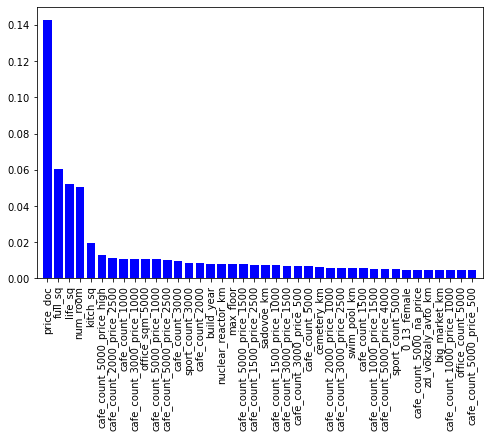

In [16]:
# plotting importances features
features = training.columns.values
imp = rf.feature_importances_
indices = np.argsort(imp)[::-1][:40]
#plot
plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), imp[indices], color = 'b', align='center')
plt.xticks(range(len(indices)), features[indices], rotation='vertical')
plt.xlim([-1,len(indices)])
plt.show()

In [17]:
#Detect importance feature in the shift data to avoid removing it from the training data
importance = features[indices]
x = set(drop_list)
y = set(importance)
z = x.intersection(y)
dropable = x - z
#Drpable Shift Feature 
print(dropable)

{'hospital_beds_raion', 'state', 'cafe_avg_price_500', 'cafe_sum_500_max_price_avg', 'cafe_sum_500_min_price_avg'}


In [18]:
#After dropping shift Classification performance Test ACC
new_train = training.drop(dropable, axis=1)
new_test = testing.drop(dropable, axis=1)
rf = DecisionTreeClassifier()
rf.fit(new_train ,y_train)
pred = rf.predict(new_test)
# print(pred)
print(accuracy_score(y_test, pred))

0.5548333333333333


train2 shape: (8400, 287) test2 shape: (3600, 287)
0.7944444444444444


c:\users\mrtay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


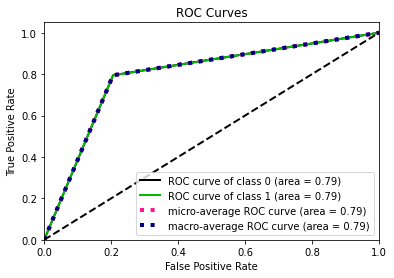

AUC score:  0.7944


In [19]:
#After dropping shift ROC Score
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
roc_train = training.drop(dropable, axis=1)
roc_test = testing.drop(dropable, axis=1)
roc_train['is_test'] = 0
roc_test['is_test'] = 1
df = pd.concat([roc_train, roc_test], axis = 0)
X = df.drop(columns=['is_test'])
y = df['is_test']
X_train, xt, yta, yt = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', xt.shape)

rfc = DecisionTreeClassifier()
rfc.fit(X_train, yta)
y_pred = rfc.predict(xt)
print(accuracy_score(yt, y_pred))
y_test_score = rfc.predict_proba(xt)
skplt.metrics.plot_roc_curve(yt, y_test_score)
plt.show()
print('AUC score: ', round(roc_auc_score(y_true=yt, y_score=y_test_score[:,1]), 4))

In [20]:
#Before dropping shift Classification performance Test ACC
new_train = training
new_test = testing
rf = DecisionTreeClassifier()
rf.fit(new_train ,y_train)
pred = rf.predict(new_test)
# print(pred)
print(accuracy_score(y_test, pred))

0.5466666666666666


train2 shape: (8400, 292) test2 shape: (3600, 292)
0.8980555555555556


c:\users\mrtay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


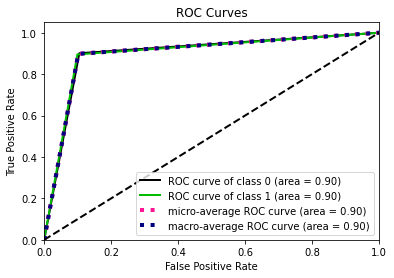

AUC score:  0.898


In [21]:
#Before dropping shift ROC Score
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
roc_train = training
roc_test = testing
roc_train['is_test'] = 0
roc_test['is_test'] = 1
df = pd.concat([roc_train, roc_test], axis = 0)
X = df.drop(columns=['is_test'])
y = df['is_test']
X_train, xt, yta, yt = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', xt.shape)

rfc = DecisionTreeClassifier()
rfc.fit(X_train, yta)
y_pred = rfc.predict(xt)
print(accuracy_score(yt, y_pred))
y_test_score = rfc.predict_proba(xt)
skplt.metrics.plot_roc_curve(yt, y_test_score)
plt.show()
print('AUC score: ', round(roc_auc_score(y_true=yt, y_score=y_test_score[:,1]), 4))

In [22]:
# Training accuracy before droping
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
X_train, xt, yta, yt = train_test_split(training, y_train, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', xt.shape)

rfc = DecisionTreeClassifier()
rfc.fit(X_train, yta)
y_pred = rfc.predict(xt)
print(accuracy_score(yt, y_pred))

train2 shape: (4200, 293) test2 shape: (1800, 293)
0.5338888888888889


In [23]:
# Training accuracy after droping
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
X_train, xt, yta, yt = train_test_split(new_train, y_train, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', xt.shape)

rfc = DecisionTreeClassifier()
rfc.fit(X_train, yta)
y_pred = rfc.predict(xt)
print(accuracy_score(yt, y_pred))

train2 shape: (4200, 293) test2 shape: (1800, 293)
0.5361111111111111
